<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/MARCA-Color.jpg" title="Title text" width="50%" height="50%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales II-2018 </h1>

<H3 align='center'> Tarea 2 - Redes Convolucionales y sus aplicaciones </H3>
<hr style="height:2px;border:none"/>



**Temas**  
* Diseño y entrenamiento de Redes Neuronales Convolucionales (CNNs).
* Regularización en Redes Convolucionales.
* *Transfer Learning.*
* Aplicaciones de las Redes Neuronales Convolucionales

**Formalidades**  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* **Fecha de entrega y discusión: 23 de Noviembre**
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<margarita.bugueno.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<cvalle@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea2-INF395-II-2018] 

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Convolutional Neural Networks (CNN) en CIFAR.  
[2.](#segundo) Transfer Learning.   
[3.](#tercero) Convolutional Neural Network sobre texto.


### **Nota Importante:**  
Para esta actividad **si es que no se cuenta con GPU** se recomienda utilizar el entorno virtual de __[Colaboratory - Google](https://colab.research.google.com/)__* . Así, podrá programar en la nube con recursos elevados y luego descargar el Jupyter Notebook y entregarlo en modo Informe.


#Enunciado

<a id="cuarto"></a>
## 3. CNN sobre texto

Cuando oimos sobre redes neuronales convolucionales (CNN) normalmente pensamos en visión artificial. Las CNN fueron responsables de los principales avances en la clasificación de imágenes y son el núcleo de la mayoría de los sistemas de *Computer Vision* en la actualidad, desde el etiquetado automático de fotos de Facebook hasta los autos que conducen por sí mismos.

Más recientemente, también hemos empezado a aplicar CNN a problemas de procesamiento del lenguaje natural (NLP) y hemos obtenido resultados interesantes. Como sabemos, las redes convolucionales tienen importantes ventajas como invarianza a rotaciones y traslaciones así como la conectividad local (características de nivel inferior en una representación de nivel superior), además de lo que las hace fuertemente ventajosas, el **compartir** parámetros.


**¿Cómo se aplica esto a NLP?**  
En esta experimentación apicaremos una red CNN al dataset  __[Adzuna](https://www.kaggle.com/c/job-salary-prediction)__ que contiene cientos de miles de registros que en su mayoría corresponden a texto no estructurado versus sólo unos pocos estructurados. Los registros pueden estar en varios formatos diferentes debido a los cientos de diferentes fuentes de registros, los cuales corresponden a anuncios de empleadores en busca de trabajadores.  
Es decir, cada fila es un anuncio que, en estricto rigor, representa una sentencia típicamente trabajada como vectores de word embeddings como **word2vec** o **GloVe**. Así, para una frase de 10 palabras bajo representaciones de *embeddings* utilizando 100 dimensiones tendríamos una matriz de 10 × 100 como entrada, lo que simularía nuestra "imagen".


Su tarea es entonces, predecir el salario (valor continuo) de un determinado anuncio en base al texto indicado en éste. Igualmente puede valerse de otros atributos del anuncio como por ejemplo la ubicación, tipo de contrato, etc. 


A continuación se presenta un código de guía para leer los archivos y pre-procesarlos. Deberá añadir y realizar lo que estime conveniente.
```python
import pandas as pd
import numpy as np
import re, os, sys
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
stoplist = stopwords.words('english')
#lemmatizer (WordNetLemmatizer())
#stemming?

df=pd.read_csv("Train_rev1.csv")
df.head()

def pre_procesar(df):
    #preprocesar texto de los anuncios
    #Eliminación de stopwords, stemming/lemmatization, puntuación, etc
    for s in textos:
        s= s.lower()
        s= re.sub(r'[^\w]', ' ',s)
        s= re.sub(r'\b[a-z]\b', ' ',  s)
        s= re.sub(r'\b[a-z][a-z]\b', ' ',  s)
        s=re.sub(r'\b[0-9]\b', ' ',  s)
        s=re.sub(r'\b[0-9][0-9]\b', ' ',  s)
        s=re.sub(r'\b[0-9][0-9][0-9]\b', ' ',  s)
        s= re.sub(r'[^\w.]', ' ', s)
        s= list(s.split())
        #s= eliminación de stopwords
        #s= stemming o lemmatization
        #guardar texto procesado
        
    return df_procesado 
  ```
 
```python
y_dataframe=df['SalaryNormalized'].values
x_dataframe=df[['FullDescription',...]]

k=len(df_procesado)
x_train=df_procesado[0:int(k*0.70)] #70% training
x_val=df_procesado[int(k*0.70):int(k*0.85)] #15% validation
x_test=df_procesado[int(k*0.85):] #15% test
```

### Embeddings 

En lugar de entrenar nuestros vectores embeddings utilizaremos el archivo __[Glove](https://www.kaggle.com/terenceliu4444/glove6b100dtxt#glove.6B.100d.txt)__ el cual cuenta con las representaciones vectoriales (de dimensionalidad 100) ya entrenadas sobre una amplia base de datos. Puede encontrar más detalle en https://nlp.stanford.edu/projects/glove/

```python
##armar diccionario word, index para posterior construccion de matriz de embeddings de glove
word_index=dict()
j=0
for frase in x_train:
    seq=frase.split()
    for term in seq:
        if term not in word_index.keys():
            word_index[term]=j
            j+=1
            

embeddings_index = {}
f = open(os.path.join('glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Se encontraron %s terminos con sus vectores de embedding.' % len(embeddings_index))


embedding_vector=100
embedding_matrix = np.zeros((len(word_index.keys()), embedding_vector))   #puede probar otra inicialización

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words sin match en Glove, serán vectores de ceros.
        embedding_matrix[i] = embedding_vector    
        
```
### Modelo

```python
"""Definir input para el modelo: """
from keras.preprocessing import sequence
x_new_train = [[word_index[word] for word in text.split()] for text in x_train]
x_new_val = [[word_index[word] for word in text.split() if word in word_index] for text in x_val]

max_input_lenght = 150 #modificar este valor en base a su experimentación
Xtrain = sequence.pad_sequences(x_new_train,maxlen=max_input_lenght,padding='post',value=0)
Xval = sequence.pad_sequences(x_new_val,maxlen=max_input_lenght,padding='post',value=0)

"""Define model trough Model API in Keras"""
from keras.layers import Embedding
from keras.layers import Conv1D, MaxPooling1D
embedding_vector=100
embedding_layer = Embedding(input_dim=len(word_index.keys()),output_dim=embedding_vector,weights=[embedding_matrix],
                     input_length=max_input_lenght,trainable=False)

sequence_input = Input(shape=(max_input_lenght,))
embedded_sequences = embedding_layer(sequence_input)
cov1= Conv1D(128, 5, activation='relu',padding='same')(embedded_sequences)
pool = MaxPooling1D(pool_size=)(cov1)
...
flat = Flatten()(layerK)
preds = Dense(1, activation='linear')(flat)
model = Model(sequence_input, preds)
model.summary()

model.compile(loss='mse',optimizer='rmsprop',metrics=['acc'])
model.fit(Xtrain, y_train, validation_data=(Xval, y_val),epochs=25, batch_size=256)
```
### Evaluación de predicciones
Para las predicciones evalúe la métrica *Mean Absolute Error* (MAE)

```python
from sklearn.metrics import mean_absolute_error
print("MAE on train: ",mean_absolute_error(y_train, model.predict(Xtrain)))
print("MAE on validation: ",mean_absolute_error(y_val, model.predict(Xval)))
```

> **Intente resolver el problema experimentando con las ayudas que se entregan en el código y lo aprendido hasta ahora en el curso. Se espera que llegue a un MAE menor a 7000 en el conjunto de pruebas. No olvide documentar todo lo experimentando en este Informe Jupyter así como el argumento de sus decisiones.**

# Desarrollo

## Kaggle & Carga Dataset

En primera instancia es necesario descargar el dataset, para esto se deben obtener los permisos requeridos para descargar el dataset a través de kaggle. Estos se obtienen descargando (para luego importar) kaggle.json desde kaggle.com, una vez creada una cuenta se obtiene desde My Account -> API -> Create new API token. A continuación se muestran los pasos para instalar la libreria kaggle además de hacer todo lo necesario para descargar el dataset.


Nota: para este dataset es necesario aceptar terminos y condiciones.

In [0]:
#instalación de kaggle y configuración de autentificación para descarga de dataset 
!pip install -U -q kaggle #instalación paquete kaggle
!mkdir -p ~/.kaggle #Se debe colocar en esta carpeta la "llave"

In [2]:
#Subir kaggle.json, que se obtiene mediante una cuenta verificada en kaggle
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gabrielrudloff","key":"1e5a431fedfdd5659081e367c19c0702"}'}

In [0]:
#mover la llave
!cp kaggle.json ~/.kaggle/

In [0]:
#Descargar dataset y ver sus contenidos
!kaggle competitions download -c job-salary-prediction
!ls

  0% 0.00/1.60M [00:00<?, ?B/s]
100% 1.60M/1.60M [00:00<00:00, 109MB/s]
  0% 0.00/1.12M [00:00<?, ?B/s]
100% 1.12M/1.12M [00:00<00:00, 246MB/s]
 86% 105M/122M [00:01<00:00, 63.1MB/s] 
100% 122M/122M [00:01<00:00, 99.8MB/s]
 43% 5.00M/11.7M [00:00<00:00, 46.1MB/s]
100% 11.7M/11.7M [00:00<00:00, 72.0MB/s]
 99% 68.0M/68.4M [00:00<00:00, 54.7MB/s]
100% 68.4M/68.4M [00:00<00:00, 72.1MB/s]
 74% 49.0M/65.8M [00:00<00:00, 27.5MB/s]
100% 65.8M/65.8M [00:00<00:00, 106MB/s] 
  0% 0.00/1.17M [00:00<?, ?B/s]
100% 1.17M/1.17M [00:00<00:00, 234MB/s]
 72% 44.0M/61.4M [00:00<00:00, 51.3MB/s]
100% 61.4M/61.4M [00:00<00:00, 103MB/s] 
 93% 31.0M/33.2M [00:00<00:00, 34.9MB/s]
100% 33.2M/33.2M [00:00<00:00, 110MB/s] 
  0% 0.00/3.37M [00:00<?, ?B/s]
100% 3.37M/3.37M [00:00<00:00, 264MB/s]
kaggle.json			       sample_data    Train_rev1.7z
Location_Tree.csv		       test.csv       Train_rev1.zip
mean_benchmark.csv		       Test_rev1.7z   Valid_rev1.7z
random_forest_benchmark_test_rev1.csv  Test_rev1.zip  Valid_r

##Preprocesamiento

A continuación se seleccióna como entrada $x$ de la red las descripciones ($'FullDescription'$) y como salida $y$ los salarios. Para esto es necesario disminuir la dimencionalidad de $x$ eliminando conectores, numeros y palabras vacias (stopwords), además de hacer una 
lematización (lemmatization) que esencialmente unifica variaciónes de una palabra a una sola.

In [0]:
#import dataset

import pandas as pd
import numpy as np
import re, os, sys
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
stoplist = stopwords.words('english')
wnl=WordNetLemmatizer()
# stemming?
from IPython.display import clear_output, display #para ver progreso


df=pd.read_csv("Train_rev1.zip", compression='zip')
df.head()

def pre_procesar(df):
    #preprocesar texto de los anuncios
    df_procesado=df.copy();
    textos=df;
    #Eliminación de stopwords, stemming/lemmatization, puntuación, etc
    for i,s in enumerate(textos):
      s= s.lower()
      s= re.sub(r'[^\w]', ' ',s)#elimina primera palabra
      #elimina conectores de 1 o 2 caracteres
      s= re.sub(r'\b[a-z]\b', ' ',  s)
      s= re.sub(r'\b[a-z][a-z]\b', ' ',  s)
      #elimina numeros de hasta 3 digitos
      s=re.sub(r'\b[0-9]\b', ' ',  s)
      s=re.sub(r'\b[0-9][0-9]\b', ' ',  s)
      s=re.sub(r'\b[0-9][0-9][0-9]\b', ' ',  s)
      s= re.sub(r'[^\w.]', ' ', s)#elimina la ultima palabra
      s=wnl.lemmatize(s)
      s= list(s.split())
      s = [w for w in s if not w in stoplist]
      df_procesado.loc[i]=s;
    return df_procesado 
y_dataframe=df['SalaryNormalized'].values
x_dataframe=df['FullDescription']

df_procesado=pre_procesar(x_dataframe);
k=len(df_procesado)
x_train=df_procesado[0:int(k*0.70)] #70% training
x_val=df_procesado[int(k*0.70):int(k*0.85)] #15% validation
x_test=df_procesado[int(k*0.85):] #15% test

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
df.head()

In [0]:
df_procesado

0         [engineering, systems, analyst, dorking, surre...
1         [stress, engineer, glasgow, salary, currently,...
2         [mathematical, modeller, simulation, analyst, ...
3         [engineering, systems, analyst, mathematical, ...
4         [pioneer, miser, engineering, systems, analyst...
5         [engineering, systems, analyst, water, industr...
6         [globally, renowned, engineering, training, co...
7         [live, vacancy, generic, advertisement, want, ...
8         [exceptional, opportunity, join, construction,...
9         [subsea, engineering, company, looking, experi...
10        [successful, results, driven, person, looking,...
11        [project, engineer, phamaceutical, excellent, ...
12        [aerospace, senior, composite, structures, eng...
13        [senior, fatigue, static, stress, metallic, co...
14        [well, respected, restaurant, located, derby, ...
15        [client, leading, supplier, precision, machine...
16        [leading, subsea, engineering,

## Fuse



>  * **Guardar variable en drive via FUSE y pickle.**
FUSE nos permite acceder a la carpera personal de drive desde google colab, permitiendonos asi guardar y cargar archivos desde este. En conjunto con la biblioteca pickle que nos permite guardar variables nos sera de mucha utilidad en particular en este problema para no tener realizar la carga y preprocesamiento de dataset cada vez.



In [4]:
#montar drive para guardar y acceder a archivos .pickle
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
#importar pickle
import pickle

In [0]:
# Guardar y junto a x ya preprocesado

#with open('drive/My Drive/T2P3_preprocesado.pickle', 'wb') as f:
#  pickle.dump([y_dataframe,df_procesado], f)

In [0]:
#Cargar las variables con:

with open('drive/My Drive/T2P3_preprocesado.pickle','rb') as f:
    y_dataframe,df_procesado = pickle.load(f)

In [0]:
k=len(df_procesado)
x_train=df_procesado[0:int(k*0.70)] #70% training
x_val=df_procesado[int(k*0.70):int(k*0.85)] #15% validation
x_test=df_procesado[int(k*0.85):] #15% test

# Embeddings

## Carga glove

In [10]:
#Descargar glove6b100d.txt
!kaggle datasets download -d terenceliu4444/glove6b100dtxt

glove6b100dtxt.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
#descomprimir
import zipfile
with zipfile.ZipFile('glove6b100dtxt.zip', 'r') as zip_ref:
    zip_ref.extractall()

##Embeddings

In [12]:
import os
import numpy as np

# Armar diccionario word, index para posterior construccion de matriz de embeddings de glove
word_index=dict()
j=0
for frase in x_train:
    seq=frase #seq=frase.split() se formateo como vector en vez de string
    for term in seq:
        if term not in word_index.keys():
            word_index[term]=j
            j+=1


#Se genera un dicciónario "embeddings_index" que para cada palabra asocia un correspondiente vector. 
#El vector es de largo 100.
embeddings_index = {}
f = open(os.path.join('glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Se encontraron %s terminos con sus vectores de embedding.' % len(embeddings_index))

embedding_vector=100
embedding_matrix = np.zeros((len(word_index.keys()), embedding_vector))   #puede probar otra inicialización

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words sin match en Glove, serán vectores de ceros.
        embedding_matrix[i] = embedding_vector    


Se encontraron 400000 terminos con sus vectores de embedding.


In [13]:
#diccionario que asoacia a cada palabra un numero
print('length =',len(word_index))
word_index


length = 159393


{'engineering': 0,
 'systems': 1,
 'analyst': 2,
 'dorking': 3,
 'surrey': 4,
 'salary': 5,
 'client': 6,
 'located': 7,
 'looking': 8,
 'provides': 9,
 'specialist': 10,
 'software': 11,
 'development': 12,
 'keywords': 13,
 'mathematical': 14,
 'modelling': 15,
 'risk': 16,
 'analysis': 17,
 'system': 18,
 'optimisation': 19,
 'miser': 20,
 'pioneeer': 21,
 'stress': 22,
 'engineer': 23,
 'glasgow': 24,
 'currently': 25,
 'talented': 26,
 'engineers': 27,
 'join': 28,
 'growing': 29,
 'team': 30,
 'variety': 31,
 'levels': 32,
 'roles': 33,
 'ideally': 34,
 'suited': 35,
 'high': 36,
 'calibre': 37,
 'graduates': 38,
 'level': 39,
 'appropriate': 40,
 'experience': 41,
 'give': 42,
 'opportunity': 43,
 'use': 44,
 'technical': 45,
 'skills': 46,
 'provide': 47,
 'quality': 48,
 'input': 49,
 'aerospace': 50,
 'projects': 51,
 'spanning': 52,
 'aerostructures': 53,
 'aeroengines': 54,
 'return': 55,
 'expect': 56,
 'good': 57,
 'career': 58,
 'opportunities': 59,
 'chance': 60,
 'adva

In [14]:
#diccionario que asocia cada palabra a un vector de largo 100
print('lenght =',len(embeddings_index)) 
embeddings_index

lenght = 400000


{'the': array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
        -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
         0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
        -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
         0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
        -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
         0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
         0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
        -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
        -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
        -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
        -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
        -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
        -1.2526  ,  0.071624,  

In [15]:
#una matriz (vector de vectores) que para cada posición tiene un vector de embedding correspondiente al termino i-esimo de word_index
#es decir, si se quiere obtener el vector de la palabra X este se obtiene a través de embedding_matrix[word_index[X]]
embedding_matrix

array([[ 1.81669995e-01,  3.11650008e-01, -6.37880027e-01, ...,
        -1.04540002e+00,  9.58829999e-01,  6.39640018e-02],
       [-2.41750002e-01,  7.66460001e-02,  4.03979987e-01, ...,
        -7.77830005e-01,  9.72689986e-01, -1.57610004e-04],
       [-6.89119995e-01, -6.15019977e-01, -7.53030032e-02, ...,
        -2.28450000e-01, -9.24520016e-01,  9.59159970e-01],
       ...,
       [ 6.08810008e-01, -3.76270004e-02,  3.24449986e-02, ...,
         6.88130021e-01,  6.35320008e-01,  5.31789996e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.61009997e-02, -2.76800007e-01, -2.03370005e-01, ...,
         4.14229989e-01, -1.98249996e-01,  1.27739996e-01]])

# Modelo

##Escalamiento Salida

Se inicia por escalar las salidas del modelo a generar ($y$), esto mediante el uso de StandardScaler de sklearn.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


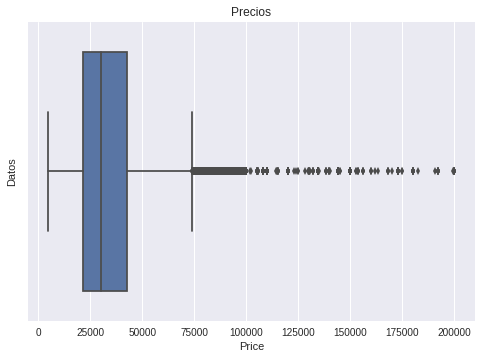

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


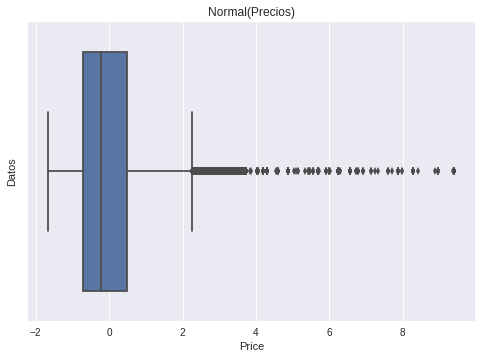

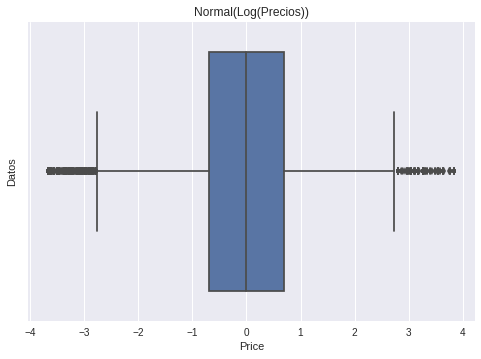

In [16]:
#mover y -> Y ~ N(1,0)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

sns.boxplot(y_dataframe)
plt.title('Precios')
plt.ylabel('Datos')
plt.xlabel('Price')
plt.show()

y=np.array(y_dataframe.reshape(-1, 1))
scaler_1=StandardScaler()
y= scaler_1.fit_transform(y)

sns.boxplot(y)
plt.title('Normal(Precios)')
plt.ylabel('Datos')
plt.xlabel('Price')
plt.show()

y=np.array(y_dataframe.reshape(-1, 1))
y= np.log((y))
scaler_2=StandardScaler()
y= scaler_2.fit_transform(y)

sns.boxplot(y)
plt.title('Normal(Log(Precios))')
plt.ylabel('Datos')
plt.xlabel('Price')
plt.show()

k=len(y)
y_train=y[0:int(k*0.70)] #70% training
y_val=y[int(k*0.70):int(k*0.85)] #15% validation
y_test=y[int(k*0.85):] #15% test

Podemos observar de la primera figura que los salarios ofrecidos tienen un  skew, encontrandose la mayoria en valores más bajos, con outlayers hacia la derecha.

De la segunda figura se concluye que una normalización de los datos no era suficiente para que estos estuvieran bien distribuidos. 

Por lo anterior se opto por aplicar el logaritmo previo a el escalamiento, con lo que se obtuvo una distribución ilustrada en la ultima figura, esta es más simetrica y por lo tanto esta mejor condicionado para el modelamiento que deseamos realizar.

## modelo 1

In [17]:
"""Definir input para el modelo: """
from keras.preprocessing import sequence
from keras import Sequential
from keras.layers import Dense,Conv1D,MaxPooling1D,Flatten,Dropout

#mapeo a numeros dado por word_index
x_new_train = [[word_index[word] for word in text] for text in x_train]
x_new_val = [[word_index[word] for word in text if word in word_index] for text in x_val]

#estandariza el tamaño de las entradas
max_input_lenght = 150 #modificar este valor en base a su experimentación
Xtrain = sequence.pad_sequences(x_new_train,maxlen=max_input_lenght,padding='post',value=0) 
Xval = sequence.pad_sequences(x_new_val,maxlen=max_input_lenght,padding='post',value=0)

"""Define model trough Model API in Keras"""
from keras.layers import Embedding
from keras.layers import Conv1D, MaxPooling1D

#La capa de embedding permite el mapeo de word_index[word] a embeddings_vector dado por la embedding_matrix
#Con esta implementación se logra mayor eficicencia en el uso de memoria que de otra manera seria excesiva
embedding_vector=100

model = Sequential()
model.add(Embedding(input_dim=len(word_index.keys()),output_dim=embedding_vector,weights=[embedding_matrix],
                     input_length=max_input_lenght,trainable=False))
model.add(Conv1D(128, 5, activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(1,activation='linear'))
model.summary()

model.compile(loss='mse',optimizer='rmsprop',metrics=['acc'])
model.fit(Xtrain, y_train, validation_data=(Xval, y_val),epochs=25, batch_size=256)

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 100)          15939300  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 150, 128)          64128     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 75, 128)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              9831424   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1025      
Total params: 25,835,877
Trainable params: 9,896,577
Non-trainable params: 15,939,300
________________________________________________________

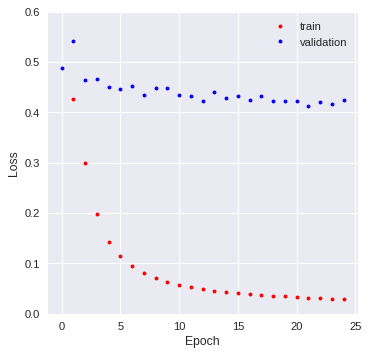

In [18]:
plt.figure(None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(model.history.history['loss'],'.r',label='train');
plt.plot(model.history.history['val_loss'],'.b',label='validation');
plt.ylabel('Loss');
plt.xlabel('Epoch')
plt.ylim([0,0.6])
plt.legend();

Por el comportamiento del loss para el validation set es evidente que existe overfitting, lo que sugiere usar algun tipo de regularizador como por ejemplo dropout.

Para obtener un MAE representativo de los datos originales es necesario hacer la transformada inversa del logaritmo y escalamiento que se hizo.

In [0]:
#funcion para calcular el mae
from sklearn.metrics import mean_absolute_error
import numpy as np

def mae_inv_t(a,b):
  return mean_absolute_error(np.exp(scaler_2.inverse_transform(a)),np.exp(scaler_2.inverse_transform(b)))

In [20]:
from sklearn.metrics import mean_absolute_error
x_new_test = [[word_index[word] for word in text if word in word_index] for text in x_test]
Xtest = sequence.pad_sequences(x_new_test,maxlen=max_input_lenght,padding='post',value=0)

#es necesario escalar el MAE
print("MAE on train: ",mae_inv_t(y_train, model.predict(Xtrain)))
print("MAE on validation: ",mae_inv_t(y_val, model.predict(Xval)))
print("MAE on test: ",mae_inv_t(y_test, model.predict(Xtest)))

MAE on train:  2106.3824413766683
MAE on validation:  8223.766434337971
MAE on test:  8047.593360575886


El desempeño esta lejos de lo esperado, por lo que sera necesario hacer modificaciones en el modelo. Como se comentaba anteriormente es necesario agregar un regularizador, junto a esto se debe modificar el largo de los datos de entrada. Para esto ultimo se observara la distribución del largo de la descripcion para cada dato.

##modelo 2
Se evalua las posibilidades y el sentido de cambiar el largo de la entrada, se aumenta a 400 y se obtiene que el comportamiento mejora ligeramente.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


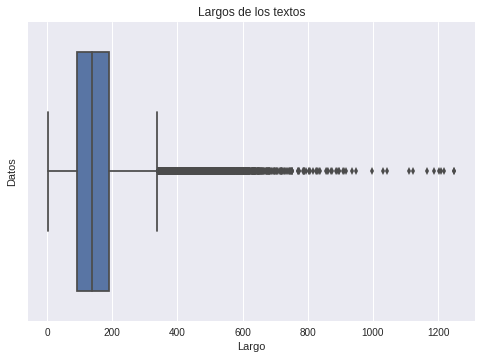

In [21]:
#observar distribución del largo de los textos
sns.boxplot([len(text) for text in df_procesado])
plt.title('Largos de los textos')
plt.ylabel('Datos')
plt.xlabel('Largo')
plt.show()

Lo anterior sugiere aumentar el largo a un valor entre 300 y 400.

In [22]:
"""Definir input para el modelo: """
from keras.preprocessing import sequence
from keras import Sequential
from keras.layers import Dense,Conv1D,MaxPooling1D,Flatten,Dropout

#mapeo a numeros dado por word_index
x_new_train = [[word_index[word] for word in text] for text in x_train]
x_new_val = [[word_index[word] for word in text if word in word_index] for text in x_val]

#estandariza el tamaño de las entradas
max_input_lenght = 400 #modificar este valor en base a su experimentación
Xtrain = sequence.pad_sequences(x_new_train,maxlen=max_input_lenght,padding='post',value=0) 
Xval = sequence.pad_sequences(x_new_val,maxlen=max_input_lenght,padding='post',value=0)

"""Define model trough Model API in Keras"""
from keras.layers import Embedding
from keras.layers import Conv1D, MaxPooling1D

#La capa de embedding permite el mapeo de word_index[word] a embeddings_vector dado por la embedding_matrix
#Con esta implementación se logra mayor eficicencia en el uso de memoria que de otra manera seria excesiva
embedding_vector=100

model = Sequential()
model.add(Embedding(input_dim=len(word_index.keys()),output_dim=embedding_vector,weights=[embedding_matrix],
                     input_length=max_input_lenght,trainable=False))
model.add(Conv1D(128, 5, activation='relu',padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1,activation='linear'))
model.summary()

model.compile(loss='mse',optimizer='rmsprop',metrics=['acc'])
model.fit(Xtrain, y_train, validation_data=(Xval, y_val),epochs=25, batch_size=256)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 400, 100)          15939300  
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 400, 128)          64128     
_________________________________________________________________
dropout_1 (Dropout)          (None, 400, 128)          0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 200, 128)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              26215424  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
__________

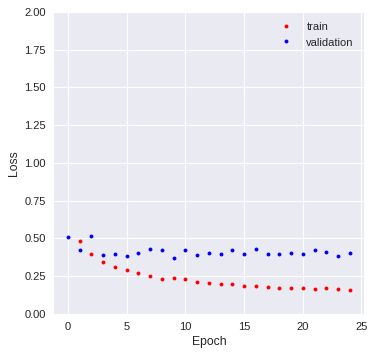

In [23]:
plt.figure(None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(model.history.history['loss'],'.r',label='train');
plt.plot(model.history.history['val_loss'],'.b',label='validation');
plt.ylabel('Loss');
plt.xlabel('Epoch')
plt.ylim([0,2])
plt.legend();

In [24]:
from sklearn.metrics import mean_absolute_error
x_new_test = [[word_index[word] for word in text if word in word_index] for text in x_test]
Xtest = sequence.pad_sequences(x_new_test,maxlen=max_input_lenght,padding='post',value=0)

#es necesario escalar el MAE
print("MAE on train: ",mae_inv_t(y_train, model.predict(Xtrain)))
print("MAE on validation: ",mae_inv_t(y_val, model.predict(Xval)))
print("MAE on test: ",mae_inv_t(y_test, model.predict(Xtest)))

MAE on train:  3721.1751243956296
MAE on validation:  8003.848518718398
MAE on test:  7843.18139133771


El comportamiento no vario mucho, una posible mejora es hacer una redistribución de los datos previo a la separación en traint test y validation.

##modelo 3
En este modelo se evalua cambiar la arquitectura, haciendola un poco más profunda. 

In [0]:
"""Definir input para el modelo: """
from keras.preprocessing import sequence
from keras import Sequential
from keras.layers import Dense,Conv1D,MaxPooling1D,Flatten,Dropout

#mapeo a numeros dado por word_index
x_new_train = [[word_index[word] for word in text] for text in x_train]
x_new_val = [[word_index[word] for word in text if word in word_index] for text in x_val]

#estandariza el tamaño de las entradas
max_input_lenght = 400 #modificar este valor en base a su experimentación
Xtrain = sequence.pad_sequences(x_new_train,maxlen=max_input_lenght,padding='post',value=0) 
Xval = sequence.pad_sequences(x_new_val,maxlen=max_input_lenght,padding='post',value=0)

"""Define model trough Model API in Keras"""
from keras.layers import Embedding
from keras.layers import Conv1D, MaxPooling1D

#La capa de embedding permite el mapeo de word_index[word] a embeddings_vector dado por la embedding_matrix
#Con esta implementación se logra mayor eficicencia en el uso de memoria que de otra manera seria excesiva
embedding_vector=100

model = Sequential()
model.add(Embedding(input_dim=len(word_index.keys()),output_dim=embedding_vector,weights=[embedding_matrix],
                     input_length=max_input_lenght,trainable=False))
model.add(Conv1D(128, 7, activation='relu',padding='same'))
model.add(Conv1D(128, 7, activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(128, 7, activation='relu',padding='same'))
model.add(Conv1D(128, 7, activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1,activation='linear'))
model.summary()

model.compile(loss='mse',optimizer='rmsprop',metrics=['acc'])
model.fit(Xtrain, y_train, validation_data=(Xval, y_val),epochs=30, batch_size=256)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 400, 100)          15939300  
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 400, 128)          89728     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 400, 128)          114816    
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 200, 128)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 200, 128)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 200, 128)          114816    
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 200, 128)          114816    
__________

In [0]:
plt.figure(None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(model.history.history['loss'],'.r',label='train');
plt.plot(model.history.history['val_loss'],'.b',label='validation');
plt.ylabel('Loss');
plt.xlabel('Epoch')
plt.ylim([0,2])
plt.legend();

In [0]:
from sklearn.metrics import mean_absolute_error
x_new_test = [[word_index[word] for word in text if word in word_index] for text in x_test]
Xtest = sequence.pad_sequences(x_new_test,maxlen=max_input_lenght,padding='post',value=0)

#es necesario escalar el MAE
print("MAE on train: ",mae_inv_t(y_train, model.predict(Xtrain)))
print("MAE on validation: ",mae_inv_t(y_val, model.predict(Xval)))
print("MAE on test: ",mae_inv_t(y_test, model.predict(Xtest)))

In [0]:
np.exp(scaler_2.inverse_transform(y_train))

In [0]:
np.exp(scaler_2.inverse_transform(model.predict(Xtrain)))

El comportamiento mejoro un poco, disminuyendo el MAE en 500 aproximadamente. 

##modelo 4
Se disminuye el batch_size

In [0]:
"""Definir input para el modelo: """
from keras.preprocessing import sequence
from keras import Sequential
from keras.layers import Dense,Conv1D,MaxPooling1D,Flatten,Dropout

#mapeo a numeros dado por word_index
x_new_train = [[word_index[word] for word in text] for text in x_train]
x_new_val = [[word_index[word] for word in text if word in word_index] for text in x_val]

#estandariza el tamaño de las entradas
max_input_lenght = 400 #modificar este valor en base a su experimentación
Xtrain = sequence.pad_sequences(x_new_train,maxlen=max_input_lenght,padding='post',value=0) 
Xval = sequence.pad_sequences(x_new_val,maxlen=max_input_lenght,padding='post',value=0)

"""Define model trough Model API in Keras"""
from keras.layers import Embedding
from keras.layers import Conv1D, MaxPooling1D

#La capa de embedding permite el mapeo de word_index[word] a embeddings_vector dado por la embedding_matrix
#Con esta implementación se logra mayor eficicencia en el uso de memoria que de otra manera seria excesiva
embedding_vector=100

model = Sequential()
model.add(Embedding(input_dim=len(word_index.keys()),output_dim=embedding_vector,weights=[embedding_matrix],
                     input_length=max_input_lenght,trainable=False))
model.add(Conv1D(128, 7, activation='relu',padding='same'))
model.add(Conv1D(128, 7, activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(128, 7, activation='relu',padding='same'))
model.add(Conv1D(128, 7, activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1,activation='linear'))
model.summary()

model.compile(loss='mse',optimizer='rmsprop',metrics=['acc'])
model.fit(Xtrain, y_train, validation_data=(Xval, y_val),epochs=25, batch_size=128)

In [0]:
plt.figure(None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(model.history.history['loss'],'.r',label='train');
plt.plot(model.history.history['val_loss'],'.b',label='validation');
plt.ylabel('Loss');
plt.xlabel('Epoch')
plt.ylim([0,2])
plt.legend();

In [0]:
from sklearn.metrics import mean_absolute_error
x_new_test = [[word_index[word] for word in text if word in word_index] for text in x_test]
Xtest = sequence.pad_sequences(x_new_test,maxlen=max_input_lenght,padding='post',value=0)

#es necesario escalar el MAE
print("MAE on train: ",mae_inv_t(y_train, model.predict(Xtrain)))
print("MAE on validation: ",mae_inv_t(y_val, model.predict(Xval)))
print("MAE on test: ",mae_inv_t(y_test, model.predict(Xtest)))

In [0]:
np.exp(scaler_2.inverse_transform(y_train))

In [0]:
np.exp(scaler_2.inverse_transform(model.predict(Xtrain)))

El comportamiento mejoro un poco, disminuyendo el MAE en 500 aproximadamente. 

##modelo 5
se hace shuffle de los datos y se disminuye el batch_size

In [0]:
"""Definir input para el modelo: """
from keras.preprocessing import sequence
from keras import Sequential
from keras.layers import Dense,Conv1D,MaxPooling1D,Flatten,Dropout

#mapeo a numeros dado por word_index
x_new_train = [[word_index[word] for word in text] for text in x_train]
x_new_val = [[word_index[word] for word in text if word in word_index] for text in x_val]

#estandariza el tamaño de las entradas
max_input_lenght = 400 #modificar este valor en base a su experimentación
Xtrain = sequence.pad_sequences(x_new_train,maxlen=max_input_lenght,padding='post',value=0) 
Xval = sequence.pad_sequences(x_new_val,maxlen=max_input_lenght,padding='post',value=0)

"""Define model trough Model API in Keras"""
from keras.layers import Embedding
from keras.layers import Conv1D, MaxPooling1D

#La capa de embedding permite el mapeo de word_index[word] a embeddings_vector dado por la embedding_matrix
#Con esta implementación se logra mayor eficicencia en el uso de memoria que de otra manera seria excesiva
embedding_vector=100

model = Sequential()
model.add(Embedding(input_dim=len(word_index.keys()),output_dim=embedding_vector,weights=[embedding_matrix],
                     input_length=max_input_lenght,trainable=False))
model.add(Conv1D(128, 7, activation='relu',padding='same'))
model.add(Conv1D(128, 7, activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(128, 7, activation='relu',padding='same'))
model.add(Conv1D(128, 7, activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1,activation='linear'))
model.summary()

model.compile(loss='mse',optimizer='rmsprop',metrics=['acc'])
model.fit(Xtrain, y_train, validation_data=(Xval, y_val),epochs=30, batch_size=128,shuffle=True)

In [0]:
plt.figure(None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(model.history.history['loss'],'.r',label='train');
plt.plot(model.history.history['val_loss'],'.b',label='validation');
plt.ylabel('Loss');
plt.xlabel('Epoch')
plt.ylim([0,2])
plt.legend();

In [0]:
from sklearn.metrics import mean_absolute_error
x_new_test = [[word_index[word] for word in text if word in word_index] for text in x_test]
Xtest = sequence.pad_sequences(x_new_test,maxlen=max_input_lenght,padding='post',value=0)

#es necesario escalar el MAE
print("MAE on train: ",mae_inv_t(y_train, model.predict(Xtrain)))
print("MAE on validation: ",mae_inv_t(y_val, model.predict(Xval)))
print("MAE on test: ",mae_inv_t(y_test, model.predict(Xtest)))

In [0]:
np.exp(scaler_2.inverse_transform(y_train))

In [0]:
np.exp(scaler_2.inverse_transform(model.predict(Xtrain)))

##modelo 6
modelo 3 pero con shuffle

In [0]:
"""Definir input para el modelo: """
from keras.preprocessing import sequence
from keras import Sequential
from keras.layers import Dense,Conv1D,MaxPooling1D,Flatten,Dropout

#mapeo a numeros dado por word_index
x_new_train = [[word_index[word] for word in text] for text in x_train]
x_new_val = [[word_index[word] for word in text if word in word_index] for text in x_val]

#estandariza el tamaño de las entradas
max_input_lenght = 400 #modificar este valor en base a su experimentación
Xtrain = sequence.pad_sequences(x_new_train,maxlen=max_input_lenght,padding='post',value=0) 
Xval = sequence.pad_sequences(x_new_val,maxlen=max_input_lenght,padding='post',value=0)

"""Define model trough Model API in Keras"""
from keras.layers import Embedding
from keras.layers import Conv1D, MaxPooling1D

#La capa de embedding permite el mapeo de word_index[word] a embeddings_vector dado por la embedding_matrix
#Con esta implementación se logra mayor eficicencia en el uso de memoria que de otra manera seria excesiva
embedding_vector=100

model = Sequential()
model.add(Embedding(input_dim=len(word_index.keys()),output_dim=embedding_vector,weights=[embedding_matrix],
                     input_length=max_input_lenght,trainable=False))
model.add(Conv1D(128, 7, activation='relu',padding='same'))
model.add(Conv1D(128, 7, activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(128, 7, activation='relu',padding='same'))
model.add(Conv1D(128, 7, activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1,activation='linear'))
model.summary()

model.compile(loss='mse',optimizer='rmsprop',metrics=['acc'])
model.fit(Xtrain, y_train, validation_data=(Xval, y_val),epochs=30, batch_size=256,shuffle=True)

In [0]:
plt.figure(None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(model.history.history['loss'],'.r',label='train');
plt.plot(model.history.history['val_loss'],'.b',label='validation');
plt.ylabel('Loss');
plt.xlabel('Epoch')
plt.ylim([0,2])
plt.legend();

In [0]:
from sklearn.metrics import mean_absolute_error
x_new_test = [[word_index[word] for word in text if word in word_index] for text in x_test]
Xtest = sequence.pad_sequences(x_new_test,maxlen=max_input_lenght,padding='post',value=0)

#es necesario escalar el MAE
print("MAE on train: ",mae_inv_t(y_train, model.predict(Xtrain)))
print("MAE on validation: ",mae_inv_t(y_val, model.predict(Xval)))
print("MAE on test: ",mae_inv_t(y_test, model.predict(Xtest)))

In [0]:
np.exp(scaler_2.inverse_transform(y_train))

In [0]:
np.exp(scaler_2.inverse_transform(model.predict(Xtrain)))

##modelo 7
modelo 3 pero con sgd

In [0]:
"""Definir input para el modelo: """
from keras.preprocessing import sequence
from keras import Sequential
from keras.layers import Dense,Conv1D,MaxPooling1D,Flatten,Dropout

#mapeo a numeros dado por word_index
x_new_train = [[word_index[word] for word in text] for text in x_train]
x_new_val = [[word_index[word] for word in text if word in word_index] for text in x_val]

#estandariza el tamaño de las entradas
max_input_lenght = 400 #modificar este valor en base a su experimentación
Xtrain = sequence.pad_sequences(x_new_train,maxlen=max_input_lenght,padding='post',value=0) 
Xval = sequence.pad_sequences(x_new_val,maxlen=max_input_lenght,padding='post',value=0)

"""Define model trough Model API in Keras"""
from keras.layers import Embedding
from keras.layers import Conv1D, MaxPooling1D
from keras.optimizers import SGD

#La capa de embedding permite el mapeo de word_index[word] a embeddings_vector dado por la embedding_matrix
#Con esta implementación se logra mayor eficicencia en el uso de memoria que de otra manera seria excesiva
embedding_vector=100

model = Sequential()
model.add(Embedding(input_dim=len(word_index.keys()),output_dim=embedding_vector,weights=[embedding_matrix],
                     input_length=max_input_lenght,trainable=False))
model.add(Conv1D(128, 7, activation='relu',padding='same'))
model.add(Conv1D(128, 7, activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(128, 7, activation='relu',padding='same'))
model.add(Conv1D(128, 7, activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1,activation='linear'))
model.summary()

opt=SGD(lr=0.1,momentum=0.9,decay=0.1)
model.compile(loss='mse',optimizer=opt,metrics=['acc'])
model.fit(Xtrain, y_train, validation_data=(Xval, y_val),epochs=15, batch_size=256)

In [0]:
plt.figure(None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(model.history.history['loss'],'.r',label='train');
plt.plot(model.history.history['val_loss'],'.b',label='validation');
plt.ylabel('Loss');
plt.xlabel('Epoch')
plt.ylim([0,2])
plt.legend();

In [0]:
from sklearn.metrics import mean_absolute_error
x_new_test = [[word_index[word] for word in text if word in word_index] for text in x_test]
Xtest = sequence.pad_sequences(x_new_test,maxlen=max_input_lenght,padding='post',value=0)

#es necesario escalar el MAE
print("MAE on train: ",mae_inv_t(y_train, model.predict(Xtrain)))
print("MAE on validation: ",mae_inv_t(y_val, model.predict(Xval)))
print("MAE on test: ",mae_inv_t(y_test, model.predict(Xtest)))

In [0]:
np.exp(scaler_2.inverse_transform(y_train))

In [0]:
np.exp(scaler_2.inverse_transform(model.predict(Xtrain)))

El comportamiento mejoro un poco, disminuyendo el MAE en 500 aproximadamente. 

#Conclusión
Se utilizo como entrada la descripción de trabajo esta se preproceso primero con una disminución de la dimensionalidad mediante la eliminación de stopwords y la lemmatización de las palabras.  Se agrego al inicio de la red una transformación que representa cada palabra por un vector 100-dimensional, lo que permite hacer una caracterización de las palabras y representa relaciónes que existen entre estas.

Como parte del preprocesamiento tambien se escalo la salida de manera que tuviese una distribución normal con media cero y varianza 1.  Esto se logro aplicandole el logaritmo a los precios y luego usando un StandardScaler proporcionado por la biblioteca sklearn.

El primer modelo que se utilizo era una capa convolucional seguida de una capa densa escondida. La primera mejora vino del analisis de los largos de  las descripciónes, con lo que se llego a la conclusión de que se debia aumentar el largo de la entrada, con lo que efectivamente se mejoro el desempeño. Luego se experimento aumentando la profundidad de la red, con lo que se logro una mejora importante del desempeño.

Se observo que las ofertas de trabajo venian agrupadas, lo que sugiere hacer un shuffle de los datos, pero esto solo empeoro el desempeño, lo que en general podria ir en contra de la logica ya que se quiere que los datos sean lo más homogeneos posibles. Pero en este caso no fue de utilidad, talvés ya que los datos quizas esten agrupados respecto a alguna tematica pero sus contenidos y salarios son muy distintos, con lo que el entrenamiento es más optimo de esa manera.

Se probo con usar como optimizador SGD en vez de RMSPROP que se estuvo utilizando hasta ahora en este ejercicio, pero el resultado fue exactamente el mismo.

Una mejora evidente es utilizar más información de la disponible. Esta puede usarse como entrada a la capa densa, en formato one hot vector para cada caracterisctica.